In [1]:
import cmocean
import xarray as xr 
import sys

# Import external functions from dea-notebooks using relative link to Scripts
sys.path.append('../10_Scripts')
import DEAPlotting
import DEADataHandling
import SpatialTools


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## CAWCR Wave Hindcast

In [55]:
# cawcr_ds = xr.open_dataset('/g/data/rr6/wave_hindcast/cawcr/model/gridded2/ww3.glob_24m.201905.nc' , chunks={'time': 1})
cawcr_ds = xr.open_dataset('/g/data/rr6/wave_hindcast/cawcr/model/gridded2/ww3.aus_10m.201904.nc' , chunks={'time': 1})
[cawcr_ds[i].attrs['long_name'] for i in cawcr_ds.variables]




['longitude',
 'latitude',
 'julian day (UT)',
 'status map',
 'depth',
 'eastward_wind',
 'northward_wind',
 'sea ice area fraction',
 'significant height of wind and swell waves',
 'mean wave length',
 'mean period T02',
 'mean period T0m1',
 'mean period T01',
 'wave peak frequency',
 'wave mean direction',
 'directional spread',
 'peak direction',
 'wave significant height partition 0',
 'wave significant height partition 1',
 'wave significant height partition 2',
 'wave significant height partition 3',
 'peak period partition 0',
 'peak period partition 1',
 'peak period partition 2',
 'peak period partition 3',
 'peak wave length partition 0',
 'peak wave length partition 1',
 'peak wave length partition 2',
 'peak wave length partition 3',
 'wave mean direction partition 0',
 'wave mean direction partition 1',
 'wave mean direction partition 2',
 'wave mean direction partition 3',
 'directional spread partition 0',
 'directional spread partition 1',
 'directional spread partiti

In [ ]:
DEAPlotting.animated_timeseries(ds=cawcr_ds,
                                output_path=f'animated_timeseries_cawcr_aus.mp4',
                                bands=['hs'],
                                interval=45,
                                width_pixels=1280,
                                x_dim='longitude',  
                                y_dim='latitude', 
                                time_dim='time',
                                annotation_kwargs={'fontsize': 30},
                                percentile_stretch=(0.01, 0.99),
                                onebandplot_kwargs={'origin':'lower', 'cmap': 'magma', 
                                                    'interpolation': 'nearest'},
                                onebandplot_cbar=False)


## Combined TOPEX/Poseidon, Jason-1/2/3 altimetry

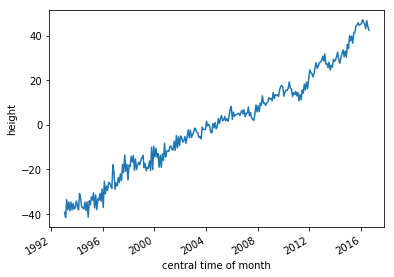

In [42]:
import xarray as xr
altimetry_ds = xr.open_dataset('/g/data/r78/rt1527/dea-notebooks/Waterline_extraction/raw_data/jb_iby_sry_gtn_giy.nc')
altimetry_ds.height.mean(dim=['lat', 'lon']).plot()

-391.0 413.0
Generating 284 frame animation
    Exporting animation to animated_timeseries_altimetry.mp4


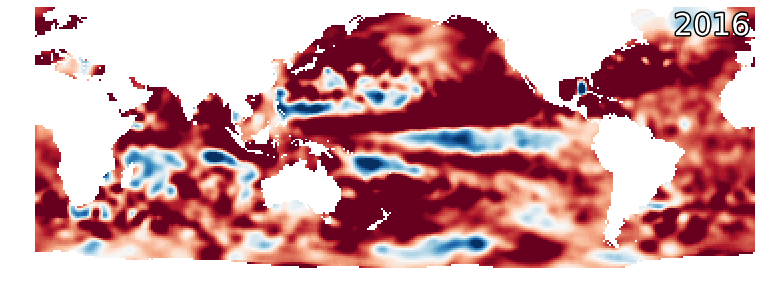

In [12]:
DEAPlotting.animated_timeseries(ds=altimetry_ds,
                                output_path=f'animated_timeseries_altimetry.mp4',
                                bands=['height'],
                                interval=50,
                                width_pixels=800,
                                x_dim='lon',  
                                y_dim='lat', 
                                time_dim='time',
                                annotation_kwargs={'fontsize': 30},
                                percentile_stretch=(0.0, 1.0),
                                show_date=False,
                                title=altimetry_ds.time.dt.year.values.tolist(),
                                onebandplot_kwargs={'origin':'lower', 'cmap': 'RdBu_r', 
                                                    'interpolation': 'nearest', 'vmin': -60, 'vmax': 60},
                                onebandplot_cbar=False)

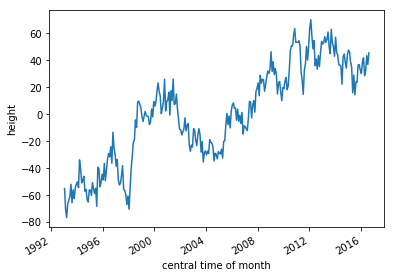

In [59]:
altimetry_aus_ds = altimetry_ds.sel(lon=slice(112.0, 155.0), 
                                           lat=slice(-47, -10))

altimetry_aus_ds.height.mean(dim=['lat', 'lon']).plot()

-283.0 323.0
Generating 284 frame animation
    Exporting animation to animated_timeseries_altimetryaus.mp4


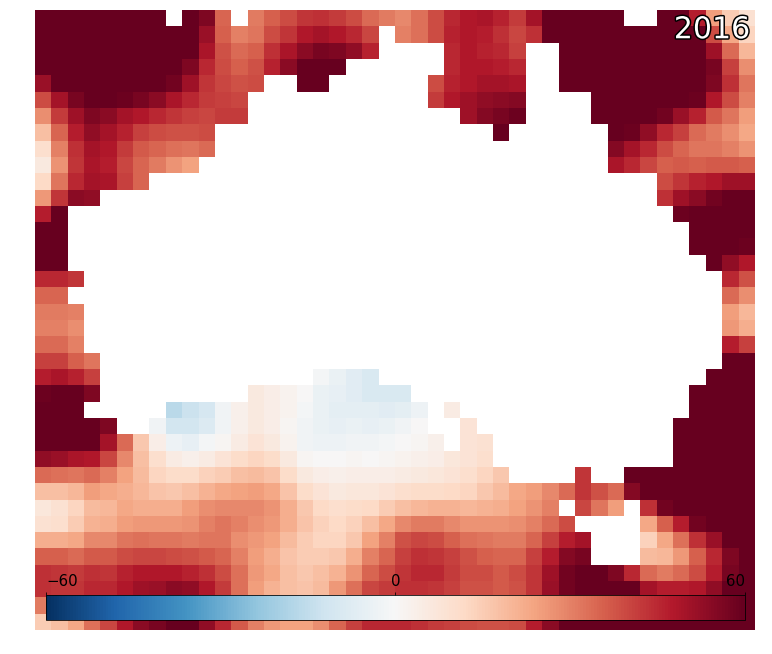

In [60]:
DEAPlotting.animated_timeseries(ds=altimetry_aus_ds,
                                output_path=f'animated_timeseries_altimetryaus.mp4',
                                bands=['height'],
                                interval=80,
                                width_pixels=800,
                                x_dim='lon',  
                                y_dim='lat', 
                                time_dim='time',
                                annotation_kwargs={'fontsize': 30},
                                percentile_stretch=(0.0, 1.0),
                                show_date=False,
                                title=altimetry_aus_ds.time.dt.year.values.tolist(),
                                onebandplot_kwargs={'origin':'lower', 'cmap': 'RdBu_r', 
                                                    'interpolation': 'nearest', 'vmin': -60, 'vmax': 60})